## Observations and Insights 

Master Copy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
avocado_data = "./avocado_updated.csv"
#hass_data_path1 = "Data/2020_Volume_Hass.csv"
#hass_data_path2 = "Data/2017_Volume_Hass.csv"
#hass_data_path3 = "Data/2018_Volume_Hass.csv"
#hass_data_path4 = "Data/2019_Volume_Hass.csv"

#avocodo_data1 = pd.read_csv(avocado_data, index_col=0)
avocodo_data1 = pd.read_csv(avocado_data, thousands=',')

#Hass exporting data
#hass_data2020 = pd.read_csv(hass_data_path1, thousands=',')
#hass_data2017 = pd.read_csv(hass_data_path2)
#hass_data2018 = pd.read_csv(hass_data_path3)
#hass_data2019 = pd.read_csv(hass_data_path4)
# Read the mouse data and the study results

# Display the data table for preview
avocado_df = avocodo_data1

Hass Avocado data file

In [2]:
#Hass data2020 datafile unedited includes "Actual and Projected values"
hass_data2020 = pd.read_csv(hass_data_path1,)

#Remove "projected" data from Hass data2020
hass_data2020 = hass_data2020.loc[hass_data2020['Status'] == "Actual"]

hass_data2020.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,"Jan 5, 2020",Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,"Jan 12, 2020",Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,"Jan 19, 2020",Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,"Jan 26, 2020",Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,"Feb 2, 2020",Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


In [3]:
#Join all Hass data files form 2017 to 2020 (Projections removed)
Hass_combined_Data = pd.concat([hass_data2020, hass_data2019, hass_data2018,hass_data2017], axis=0, join='outer', ignore_index=False)

#updated the "week" to conform the same format
Hass_combined_Data["Week"]= pd.to_datetime(Hass_combined_Data["Week"], infer_datetime_format=True, format="%M/%D/%Y")

#Reviwing data and rows in Hass dataset
numOfRows = Hass_combined_Data.shape[0]
countofWeeks = Hass_combined_Data['Week'].nunique()

print('Count number of Rows in dataframe : ' , numOfRows)
print('Count number of Weeks: ',countofWeeks)    
#print results
Hass_combined_Data.head()

Count number of Rows in dataframe :  185
Count number of Weeks:  185


,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2020-01-05,Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,2020-01-12,Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,2020-01-19,Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,2020-01-26,Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,2020-02-02,Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


Avacado file 2015 to 2019 (December 1,2019)

In [7]:
#avocado_df['Year'] = avocado_df.Year.astype(object)
avocado_df.dtypes

Unnamed: 0          int64
Date               object
Price             float64
Total Volume      float64
Small Avocado     float64
Large Avocado     float64
XLarge Avocado    float64
Total Bags        float64
Small Bags        float64
Large Bags        float64
XLarge Bags       float64
Year                int64
Region             object
Conventional       object
Organic            object
dtype: object

In [8]:
#Display avocado datafile Data from 2015 to 2020
avocado_df.dropna()
avocado_df.head()

,Unnamed: 0,Date,Price,Total Volume,Small Avocado,Large Avocado,XLarge Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Region,Conventional,Organic
0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany,conventional,NaN
1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,Albany,conventional,NaN
2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,Albany,conventional,NaN
3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,2015,Albany,conventional,NaN
4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,2015,Albany,conventional,NaN


In [9]:
#Clean up avocado data for regions multiple spellings to be correction

avocado_df['Region']=avocado_df['Region'].replace(
   {'BaltimoreWashington':'Baltimore/Washington',
   'BuffaloRochester':'Buffalo/Rochester', 
   'CincinnatiDayton':'Cincinnati/Dayton',
   'DallasFtWorth':'Dallas/Ft. Worth',
    'GreatLakes':'Great Lakes',
   'GrandRapids':'Grand Rapids', 
   'HarrisburgScranton':'Harrisburg/Scranton', 
   'HartfordSpringfield':'Hartford/Springfield', 
   'LasVegas':'Las Vegas', 
   'LosAngeles':'Los Angeles',
    'MiamiFtLauderdale':'Miami/Ft. Lauderdale',
   'NewOrleansMobile':'New Orleans/Mobile', 
    'NewYork':'New York',
    'NorthernNewEngland':'Northern New England',
    'PhoenixTucson':'Phoenix/Tucson',
    'RaleighGreensboro':'Raleigh/Greensboro',
    'RichmondNorfolk':'Richmond/Norfolk',
    'SanDiego':'San Diego',
    'SanFrancisco':'San Francisco',
    'SouthCarolina':'South Carolina',
    'SouthCentral':'South Central',
    'StLouis':'St. Louis',
    'TotalUS':'All Other US',
    'Total U.S.':'All Other US',
    'WestTexNewMexico':'West Tex/New Mexico',}   
)

numOfRows = avocado_df.shape[0]
countofRegions = avocado_df['Region'].nunique()

print('Count number of Rows in dataframe : ' , numOfRows)
print('Count number of Regions: ',countofRegions)      

#avocado_df['Region'].value_counts().sort_index()

('Count number of Rows in dataframe : ', 27323)
('Count number of Regions: ', 54)


In [10]:
avocado_df.head()

,Unnamed: 0,Date,Price,Total Volume,Small Avocado,Large Avocado,XLarge Avocado,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Region,Conventional,Organic
0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,Albany,conventional,NaN
1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,2015,Albany,conventional,NaN
2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,2015,Albany,conventional,NaN
3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,2015,Albany,conventional,NaN
4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,2015,Albany,conventional,NaN


In [37]:
small = avocado_df.filter(items=["Small Avocado", "Region"])
large = avocado_df.filter(items=["Large Avocado", "Region"])
xlarge = avocado_df.filter(items=["XLarge Avocado", "Region"])


In [44]:
small_albany = small.loc[small["Region"] == "Albany"]
large_albany = large.loc[large["Region"] == "Albany"]
xlarge_albany = xlarge.loc[xlarge["Region"] == "Albany"]

s_small = small_albany.sum()
s_large = large_albany.sum()
s_xlarge = xlarge_albany.sum()

s_all = np.array([s_small, s_large, s_xlarge])

print(s_all.max)

#small_albany.hist(bins=30)
#large_albany.hist(bins=30)
#xlarge_albany.hist(bins=30)

x = ["Albany", ....]
y = [2e4, 2.3e5, ...]

plt.figure()
plt.plot(x, y)
plt.xlabel('txst  ')
plt.ylabel('text')
plt.grid()
plt.legend('txt')
plt.title('txt')
plt.show()


AttributeError: 'builtin_function_or_method' object has no attribute 'value'

In [26]:
idx = avocado_df["Region"]
avocado_df[]

0                     Albany
1                     Albany
2                     Albany
3                     Albany
4                     Albany
5                     Albany
6                     Albany
7                     Albany
8                     Albany
9                     Albany
10                    Albany
11                    Albany
12                    Albany
13                    Albany
14                    Albany
15                    Albany
16                    Albany
17                    Albany
18                    Albany
19                    Albany
20                    Albany
21                    Albany
22                    Albany
23                    Albany
24                    Albany
25                    Albany
26                    Albany
27                    Albany
28                    Albany
29                    Albany
                ...         
27293    West Tex/New Mexico
27294    West Tex/New Mexico
27295    West Tex/New Mexico
27296    West 

In [24]:
df = avocado_df.groupby("Region", sort=False)["Region"]


In [25]:
df.describe()

,count,unique,top,freq
Region,,,,
Albany,506,1,Albany,506
Atlanta,506,1,Atlanta,506
Baltimore/Washington,506,1,Baltimore/Washington,506
Boise,506,1,Boise,506
Boston,506,1,Boston,506
Buffalo/Rochester,506,1,Buffalo/Rochester,506
California,506,1,California,506
Charlotte,506,1,Charlotte,506
Chicago,506,1,Chicago,506


In [10]:
MinVol = (avocado_df.groupby(["Region", "Year"])["Total Volume"].agg(['min']).style.format('{0:,.2f}'))
MeanVol = (avocado_df.groupby(["Region", "Year"])["Total Volume"].agg(['mean']).style.format('{0:,.2f}'))
MaxVol = (avocado_df.groupby(["Region", "Year"])["Total Volume"].agg(['max']).style.format('{0:,.2f}'))


In [11]:
RegionType=avocado_df[["Region", "Small Avocado", "Large Avocado", "XLarge Avocado","Total Bags"]].head()

RegionType

,Region,Small Avocado,Large Avocado,XLarge Avocado,Total Bags
0,Albany,2819.50,28287.42,49.90,9716.46
1,Albany,1002.85,31640.34,127.12,8424.77
2,Albany,914.14,31540.32,135.77,11921.05
3,Albany,941.38,33196.16,164.14,10845.82
4,Albany,1353.90,60017.20,179.32,9323.18


In [12]:

#NewAvo=avocado_df[["Region","Small Avocado",]].head()
Small=avocado_df[["Region","Small Avocado"]].mean()
Large=avocado_df[["Region","Large Avocado"]].mean()
XLarge=avocado_df[["Region","XLarge Avocado"]].mean()
Total_Bags=avocado_df[["Region","Total Bags"]].mean()

print("All Types"
      ,Total_Bags, Small, Large, XLarge)

All Types Total Bags    305873.958118
dtype: float64 Small Avocado    295318.733122
dtype: float64 Large Avocado    290105.934224
dtype: float64 XLarge Avocado    22158.678189
dtype: float64


In [13]:
SmallCounts = avocado_df["Small Avocado"].sum()
print("Total Small Avocados for data" , SmallCounts)

LargeCounts = avocado_df["Large Avocado"].sum()
print("Total Large Avocados for data" , LargeCounts)

XLargeCounts = avocado_df["XLarge Avocado"].sum()
print("Total XLarge Avocados for data" , XLargeCounts)

BagCounts = avocado_df["Total Bags"].sum()
print("Total Bags Avocados for data" , BagCounts)

YearCounts=pd.DataFrame({"Total Small Avocados for data":[SmallCounts],"Total Large Avocados for data":[LargeCounts]
                        ,"Total XLarge Avocados for data":[XLargeCounts],"Total Bags Avocados for data":[BagCounts]})
YearCounts

Total Small Avocados for data 8068993745.09
Total Large Avocados for data 7926564440.81
Total XLarge Avocados for data 605441564.1600001
Total Bags Avocados for data 8357394157.67


,Total Small Avocados for data,Total Large Avocados for data,Total XLarge Avocados for data,Total Bags Avocados for data
0,8.068994e+09,7.926564e+09,6.054416e+08,8.357394e+09


In [15]:
#Can the type of Avocado offered affect sales?
#How popular are avocados in certain regions?
Millions = 
stat_table = (avocado_df.groupby("Year")["Millions"].agg([sum]))
stat_table = pd.DataFrame(avocado_df.groupby("Region").sum())

stat_table["SEM"] = pd.DataFrame(avocado_df.groupby("Region")["Small Avocado"].sem())
stat_table["Median"] = pd.DataFrame(avocado_df.groupby("Region")["Small Avocado"].median())
stat_table["Standard Deviation"] = pd.DataFrame(avocado_df.groupby("Region")["Small Avocado"].std())
stat_table["Mean"] = pd.DataFrame(avocado_df.groupby("Region")["Small Avocado"].mean())
stat_table["Variance"] = pd.DataFrame(avocado_df.groupby("Region")["Small Avocado"].var())
stat_table =stat_table[["Total Volume"
                        ,"Mean", "Median","Variance"
                        , "Standard Deviation", "SEM", ]]
stat_table

SyntaxError: invalid syntax (<ipython-input-15-5657f4b08858>, line 3)

In [16]:
#stat_table1 = pd.DataFrame(avocado_df.groupby("Region").count())
#index=["0]
Tot_small = avocado_df["Small Avocado"].sum()
Tot_Large = avocado_df["Large Avocado"].sum()
Tot_XLarge = avocado_df["XLarge Avocado"].sum()
Tot_Bags = avocado_df["Total Bags"].sum()

In [18]:
Total = avocado_df.groupby(["Year", 'Total Volume'])


In [186]:
#All totals of all avocado types in lbs.
Tot_Small = avocado_df["Small Avocado"].sum()
Tot_Large = avocado_df["Large Avocado"].sum()
Tot_XLarge = avocado_df["XLarge Avocado"].sum()
Tot_Bags= avocado_df["Total Bags"].sum()
Tot_Volume = Tot_Small + Tot_Large + Tot_XLarge + Tot_Bags

Tot_Volume.sum()

24958393907.730003

In [19]:
NewData = pd.DataFrame({"Small Avocado":Tot_small,
                          "Large Avocado":Tot_Large,
                        "XLarge Avocado":Tot_XLarge,
                         "Total Bags":Tot_Bags,})

ValueError: If using all scalar values, you must pass an index

In [20]:
#Plotting data by Region and total volumes January 2015 to 
plt.figure(figsize=(24,10))
plt.bar(avocado_df['Region'],Tot_Volume["Small Avocado"])
plt.title("Data based on the Avocado sales within the United Stated by region", fontsize=16, fontweight="bold")
plt.xlabel('United States Region', fontsize=15, fontweight="bold")
plt.ylabel('Total Volume by lbs in Billions',fontsize=16, fontweight="bold")
plt.xticks(rotation=75)
plt.show()

NameError: name 'Tot_Volume' is not defined

<Figure size 1728x720 with 0 Axes>

In [21]:
xSmall_ax=Tot_Small.index.values
ySmall_ax=Tot_Small["mean"]

plt.title("Avocado by type")
plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.plot(xSmall_ax,ySmall_ax,)
#plt.legend()
plt.show

NameError: name 'Tot_Small' is not defined

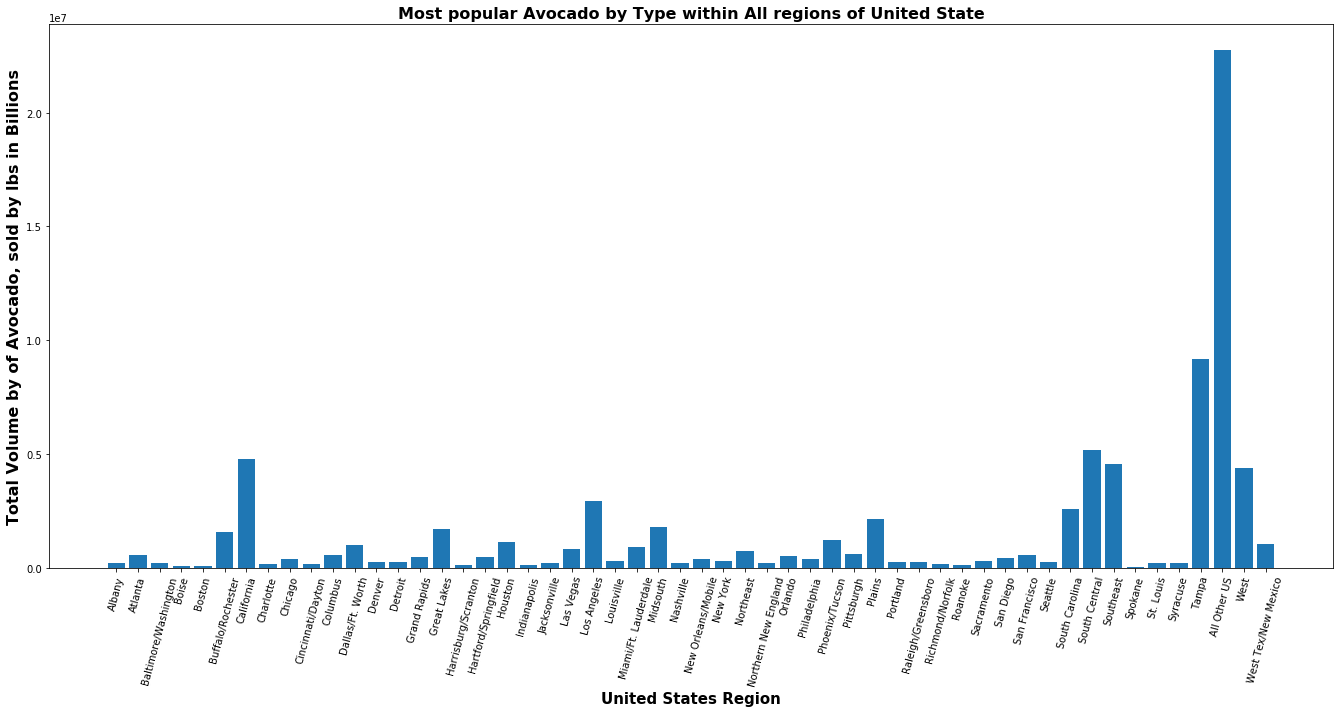

In [22]:
#plt.RegionType=avocado_df[["Region", "Small Avocado", "Large Avocado", "XLarge Avocado","Total Bags"]].head()

plt.figure(figsize=(23,10))
plt.bar(avocado_df['Region'],avocado_df['Small Avocado'])
plt.title("Most popular Avocado by Type within All regions of United State", fontsize=16, fontweight="bold")
plt.xlabel('United States Region', fontsize=15, fontweight="bold")
plt.ylabel('Total Volume by of Avocado, sold by lbs in Billions',fontsize=16, fontweight="bold")
plt.xticks(rotation=75)
plt.show()

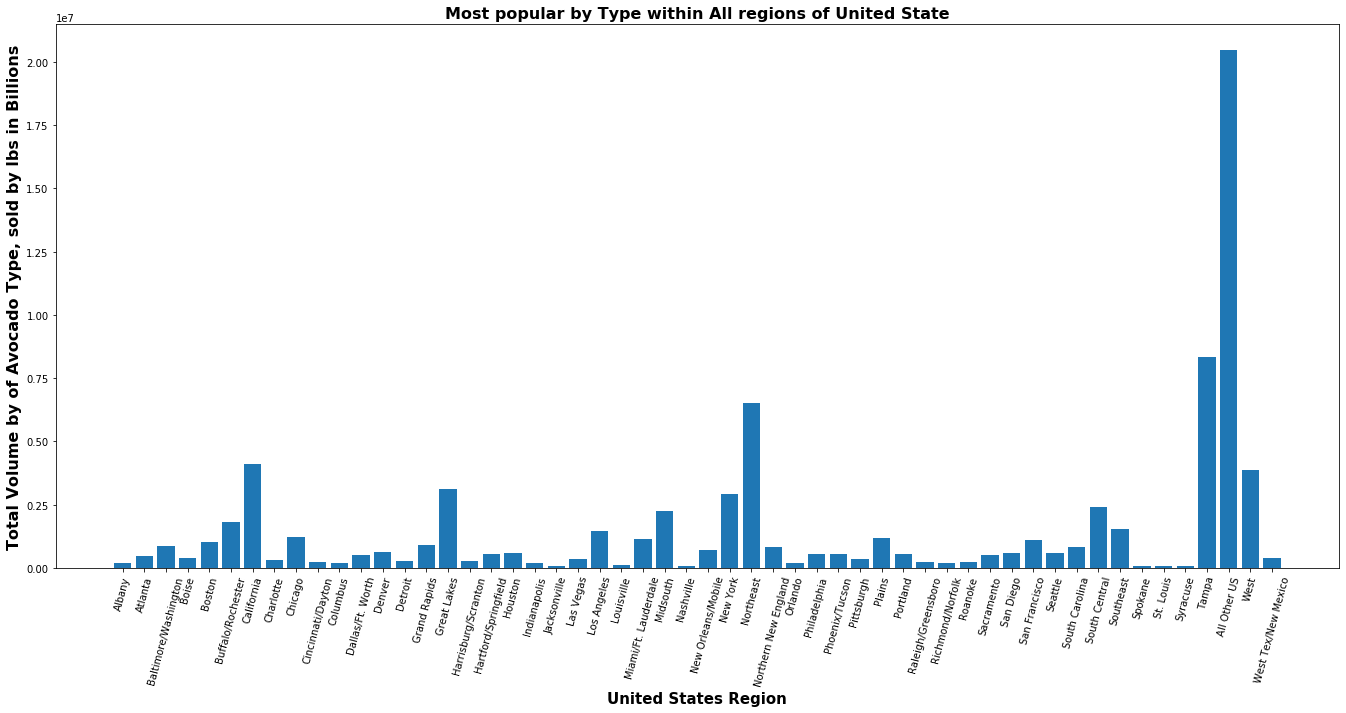

In [23]:
#plt.RegionType=avocado_df[["Region", "Small Avocado", "Large Avocado", "XLarge Avocado","Total Bags"]].head()

plt.figure(figsize=(23,10))
plt.bar(avocado_df['Region'],avocado_df['Large Avocado'])
plt.title("Most popular by Type within All regions of United State", fontsize=16, fontweight="bold")
plt.xlabel('United States Region', fontsize=15, fontweight="bold")
plt.ylabel('Total Volume by of Avocado Type, sold by lbs in Billions',fontsize=16, fontweight="bold")
plt.xticks(rotation=75)
plt.show()

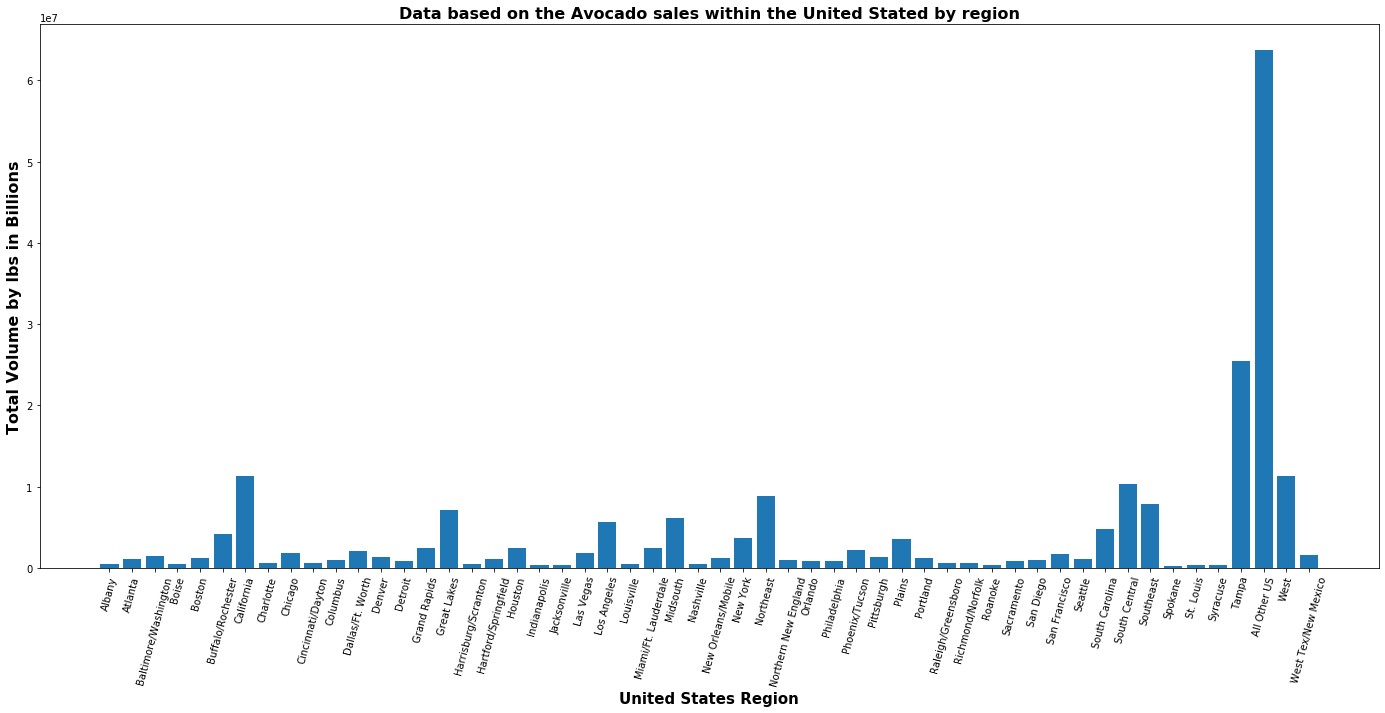

In [24]:
#Plotting data by Region and total volumes January 2015 to 

plt.figure(figsize=(24,10))
plt.bar(avocado_df['Region'],avocado_df['Total Volume'])
plt.title("Data based on the Avocado sales within the United Stated by region", fontsize=16, fontweight="bold")
plt.xlabel('United States Region', fontsize=15, fontweight="bold")
plt.ylabel('Total Volume by lbs in Billions',fontsize=16, fontweight="bold")
plt.xticks(rotation=75)
plt.show()

In [25]:
#tots = TotV_Coun["2017"]
Tot_Small = avocado_df["Small Avocado"].sum()
Tot_Small

8068993745.09

<Figure size 1728x720 with 0 Axes>

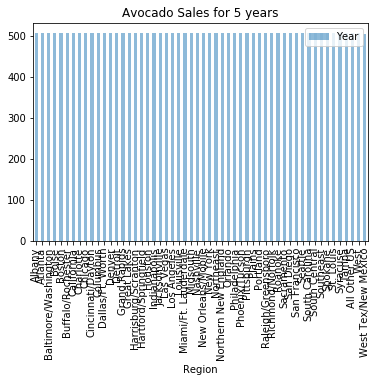

In [26]:
plt.figure(figsize=(24,10))
Avocado_Sales = avocado_df[['Region']].drop_duplicates()
Avocado_Sales['Year'] = avocado_df.groupby('Region').count()['Year'].values
Counts=avocado_df['Region'].value_counts()

Avocado_Sales.plot.bar('Region','Year',alpha = 0.5)
plt.title("Avocado Sales for 5 years")
plt.show()
#plt.savefig('BarPlot1')

In [27]:
# Can the type of avocado affect sales and why

Avocado_Type_Sales = avocado_df[['Price']].sort_index()
Avocado_Type_Sales['Price'] = avocado_df.groupby('Region').count()['Price'].index
Price=avocado_df['Price'].value_counts()
Avocado_Type_Sales.plot.bar('Region','Price',alpha = 0.1)
plt.title("Avocado Sales from 2017 to 2020")
plt.show()
plt.savefig('BarPlot1')

ValueError: Length of values does not match length of index

In [ ]:
region_list=list(avocado_df.Region.unique())
average_TV=[]

for i in region_list:
    x=avocado_df[avocado_df.Region==i]
    region_average=sum(x.Price)/len(x)
    average_TV.append(region_average)

df1=pd.DataFrame({'Region':region_list,'Total Volume':average_TV})
new_index=df1.average_TV.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_TV)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Total Volume')
plt.title('Average Price of Avocado According to Region')

Beginning Hass data 2017 to 2020

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,"Jan 5, 2020",Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,"Jan 12, 2020",Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,"Jan 19, 2020",Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,"Jan 26, 2020",Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,"Feb 2, 2020",Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,"Jan 5, 2020",Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,"Jan 12, 2020",Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,"Jan 19, 2020",Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,"Jan 26, 2020",Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,"Feb 2, 2020",Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


In [67]:
#Changing the date of all Hass data files to match date format
#hass_data2020["Week"] = pd.to_datetime(hass_data1["Week"], infer_datetime_format=True, format="%Y/%m/%d")
#hass_data1.head()

In [54]:
#Join all Hass data files form 2017 to 2020 (Projections removed)
Hass_combined_Data = pd.concat([hass_data2020, hass_data2019, hass_data2018,hass_data2017], axis=0, join='outer', ignore_index=False)

#updated the "week" to conform the same format
Hass_combined_Data["Week"]= pd.to_datetime(Hass_combined_Data["Week"], infer_datetime_format=True, format="%M/%D/%Y")

#print results
Hass_combined_Data.head()

,Week,Status,Total Volume,California,Chile,Mexico,Peru,Colombia
0,2020-01-05,Actual,"32,537,444","37,220","159,041","32,291,182",0,"50,000"
1,2020-01-12,Actual,"65,307,572","319,866","177,780","64,809,925",0,0
2,2020-01-19,Actual,"76,375,629","1,604,707","222,755","74,498,167",0,"50,000"
3,2020-01-26,Actual,"66,647,112","2,822,485",0,"63,774,627",0,"50,000"
4,2020-02-02,Actual,"45,414,983","2,704,489",0,"42,710,494",0,0


In [55]:
#Reviwing data and rows in Hass dataset

numOfRows = Hass_combined_Data.shape[0]
countofWeeks = Hass_combined_Data['Week'].nunique()

print('Count number of Rows in dataframe : ' , numOfRows)
print('Count number of Weeks: ',countofWeeks)      


Count number of Rows in dataframe :  185
Count number of Weeks:  185


In [56]:
# Can the typ of avocado affect sales and why

#Avocado_Type_Sales = avocado_df[['Price']].sort_index()
#Avocado_Type_Sales['Price'] = avocado_df.groupby('Region').count()['Price'].values
#Price=avocado_df['Price'].value_counts()
#Avocado_Type_Sales.plot.bar('Region','Price',alpha = 0.1)
#plt.title("Avocado Sales from 2017 to 2020")
#plt.show()
#plt.savefig('BarPlot1')

ValueError: Length of values does not match length of index

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
